In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [19]:

from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9841722222222222


In [23]:

ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.29, 0.71]])

In [24]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [25]:
##Adaboost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [27]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [28]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851222222222222


In [29]:
pd.concat(pred,axis=1)

0         1         2    3
0    0.98  0.991861  0.559186  1.0
1    0.04  0.000008  0.463282  0.0
2    0.94  0.966929  0.538202  0.8
3    0.95  0.761539  0.509875  0.8
4    0.56  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.00  0.024239  0.461121  0.0
596  0.02  0.000003  0.441377  0.0
597  0.98  0.984385  0.532403  1.0
598  0.02  0.001147  0.441720  0.2
599  0.99  0.989540  0.559890  0.8

[600 rows x 4 columns]

In [30]:
final_prediction

0      0.882762
1      0.125823
2      0.811283
3      0.755353
4      0.557447
         ...   
595    0.121340
596    0.115345
597    0.874197
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [31]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90873256, 0.90827475, 0.79949934,
       0.79912833, 0.79317698, 0.7930558 , 0.77242916, 0.77037124,
       0.76547605, 0.76321156, 0.72701656, 0.72387362, 0.70657482,
       0.69893711, 0.66287883, 0.65743537, 0.61029968, 0.59675354,
       0.58995356, 0.58736186, 0.56042732, 0.55877948, 0.55744674,
       0.55389283, 0.52365858, 0.49866892, 0.45990225, 0.43222765,
       0.4296034 , 0.40841982, 0.40379719, 0.36155357, 0.35836612,
       0.25167805, 0.24396893, 0.23698424, 0.23640421, 0.20233682,
       0.19848417, 0.12033548, 0.1203351 , 0.10548439])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
29    0.432228  0.961667
30    0.429603  0.960000
28    0.459902  0.960000
27    0.498669  0.958333
31    0.408420  0.956667

In [33]:
accuracy_ls

thresholds  accuracy
29    0.432228  0.961667
30    0.429603  0.960000
28    0.459902  0.960000
27    0.498669  0.958333
31    0.408420  0.956667
26    0.523659  0.956667
25    0.553893  0.956667
24    0.557447  0.956667
23    0.558779  0.956667
22    0.560427  0.955000
32    0.403797  0.955000
21    0.587362  0.945000
33    0.361554  0.945000
20    0.589954  0.945000
34    0.358366  0.943333
18    0.610300  0.943333
19    0.596754  0.943333
17    0.657435  0.938333
16    0.662879  0.936667
15    0.698937  0.921667
14    0.706575  0.920000
13    0.723874  0.910000
12    0.727017  0.908333
35    0.251678  0.886667
36    0.243969  0.885000
37    0.236984  0.880000
38    0.236404  0.878333
11    0.763212  0.856667
10    0.765476  0.855000
9     0.770371  0.850000
8     0.772429  0.848333
39    0.202337  0.846667
40    0.198484  0.845000
7     0.793056  0.823333
6     0.793177  0.821667
5     0.799128  0.815000
4     0.799499  0.813333
41    0.120335  0.638333
42    0.120335  0.636667
3     0.908275  0.506667
2     0.908733  0.505000
43    0.105484  0.501667
1     0.913441  0.500000
0     1.913441  0.500000

In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

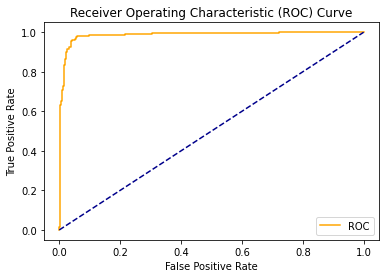

In [35]:
plot_roc_curve(fpr,tpr)